<a href="https://colab.research.google.com/github/MahendraVarma17/projects/blob/main/olympics_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [36]:
df = pd.read_excel('/content/Athletes.xlsx')
df.fillna(0, inplace=True)

In [38]:
le = LabelEncoder()
df['NOC'] = le.fit_transform(df['NOC'])
# The 'Competitions' column does not exist, so we remove this line
# df['Competitions'] = le.fit_transform(df['Competitions'])
df['Discipline'] = le.fit_transform(df['Discipline'])


# Since there are no medal columns, we cannot create the 'Medal_Gold' target variable
# df['Medal_Gold'] = df['Gold'].apply(lambda x: 1 if x > 0 else 0)
# print("Gold Medal Distribution:\n", df['Medal_Gold'].value_counts())


# We need to define a target variable. Let's try to predict the 'Discipline' for now.
X = df[['NOC']]
y = df['Discipline']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.17378232110643416
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        57
           3       0.00      0.00      0.00        37
           4       0.17      1.00      0.30       578
           5       0.00      0.00      0.00        61
           6       0.00      0.00      0.00        65
           7       0.00      0.00      0.00        78
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00        82
          10       0.00      0.00      0.00        24
          11       0.00      0.00      0.00        78
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

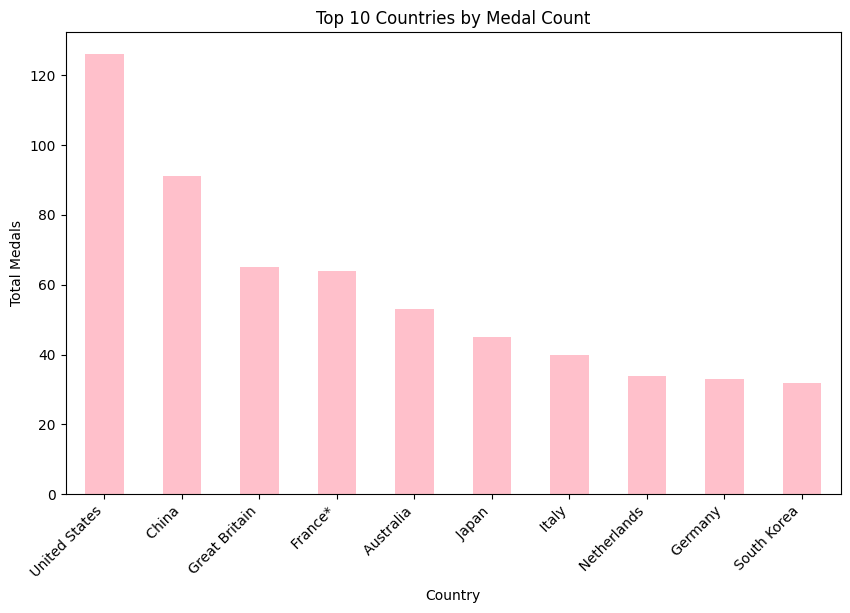

In [40]:
original_df = pd.read_csv('/content/Olympics 2024.csv')

merged_df = df.merge(original_df[['NOC', 'Total']], left_index=True, right_index=True, suffixes=('', '_original'))
medals_by_country = merged_df.groupby('NOC_original')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='pink')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=45, ha='right')
plt.show()

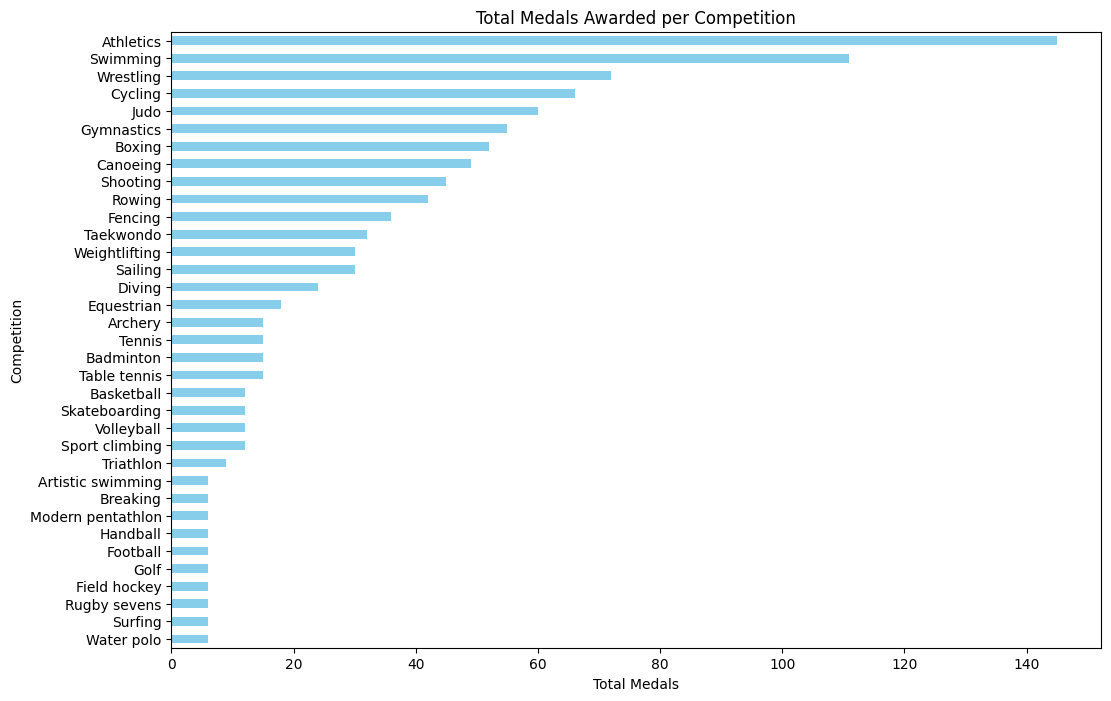

In [33]:
merged_df_competitions = df.merge(original_df[['Competitions']], left_index=True, right_index=True, suffixes=('_encoded', '_original'))
medals_by_competition = merged_df_competitions.groupby('Competitions_original')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
medals_by_competition.plot(kind='barh', color='skyblue')
plt.title('Total Medals Awarded per Competition')
plt.xlabel('Total Medals')
plt.ylabel('Competition')
plt.gca().invert_yaxis() # To display the competition with the most medals at the top
plt.show()

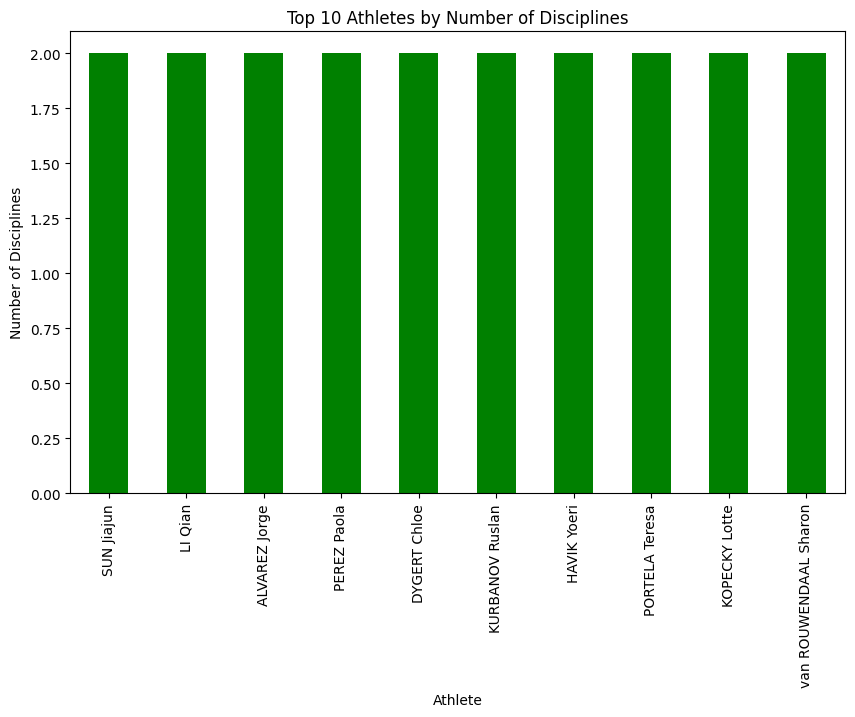

In [50]:
athlete_medal_count = df.groupby('Name')['NOC'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Athletes by Number of Disciplines")
plt.xlabel("Athlete")
plt.ylabel("Number of Disciplines")
plt.show()

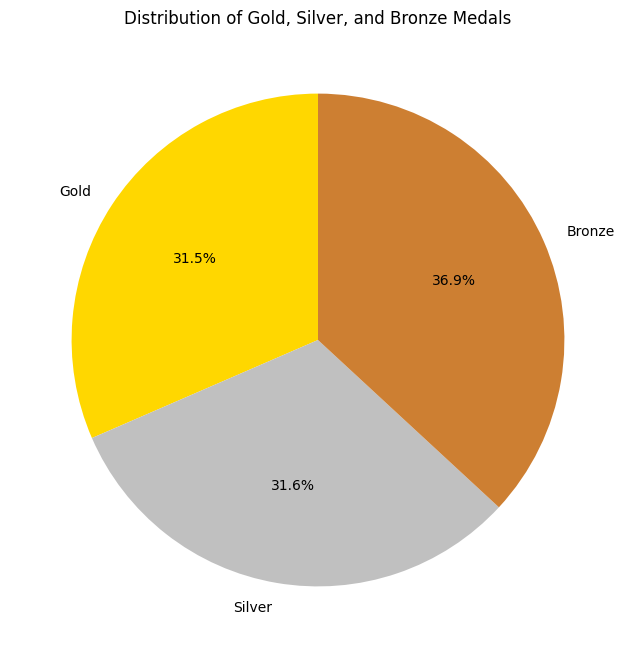

In [34]:
medal_counts = df[['Gold', 'Silver', 'Bronze']].sum()
plt.figure(figsize=(8, 8))
medal_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FFD700', '#C0C0C0', '#CD7F32'], startangle=90)
plt.title('Distribution of Gold, Silver, and Bronze Medals')
plt.ylabel('') # Hide the y-axis label for a cleaner look
plt.show()

/tmp/ipython-input-43-1021016005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_disciplines.values, y=top_disciplines.index, palette='viridis')


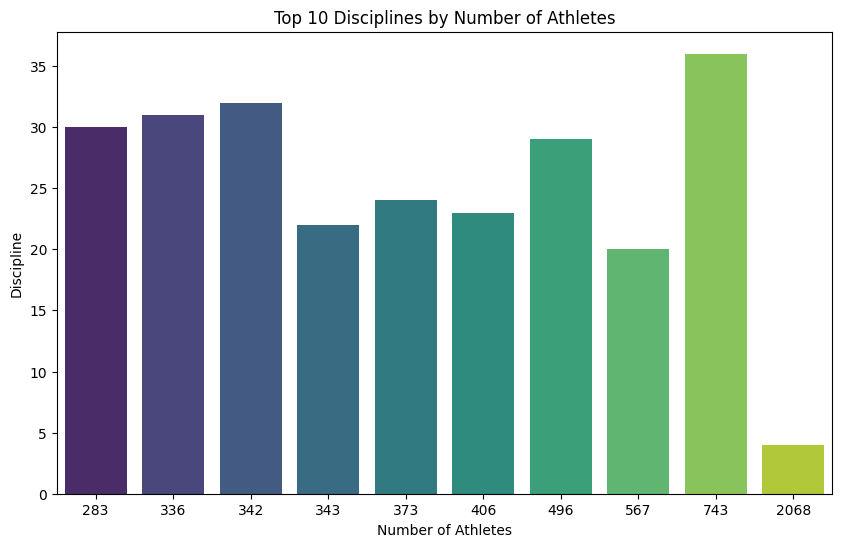

In [43]:
top_disciplines = df['Discipline'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_disciplines.values, y=top_disciplines.index, palette='viridis')
plt.title('Top 10 Disciplines by Number of Athletes')
plt.xlabel('Number of Athletes')
plt.ylabel('Discipline')
plt.show()